# Supernovae distances and redshift

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

#### If you have time (or later at home...)

- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import generate_mu_z
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson
from astroML import linear_model

/Users/federicoastori/opt/anaconda3/lib/python3.8/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


Collect the data


(35.0, 50.0)

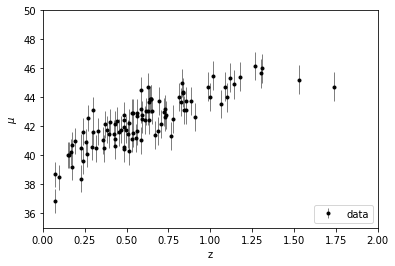

In [2]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

Set the variable to pass to sklearn regression algorithms

In [3]:
X=np.array(z_sample).reshape(100,-1)
y=mu_sample

39.56505554722625 [4.64711848]


(35.0, 50.0)

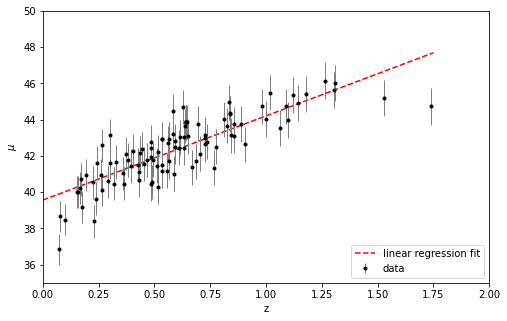

In [4]:
# Linear regression

X_new = np.array([[0], [1.75]]) #like X_grid, but just with the endpoints

lin_reg = LinearRegression()
lin_reg.fit(X, y, sample_weight=1.0)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)
y_pred = lin_reg.predict(X_new)

plt.figure(figsize=(8,5))
plt.plot(X_new,y_pred, 'r--', label='linear regression fit')
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

[38.44821027  8.49035585 -2.57760572]
[38.49130243  8.23905057 -2.20391808 -0.15168104]
[ 37.0543994   20.74217865 -32.83020744  27.30599762  -7.98337391]
[ 36.18760445  31.00142053 -69.82397489  82.84185044 -44.24104125
   8.47059008]
[  35.52810145   41.0777603  -119.2923833   190.65950213 -159.23341791
   67.07109508  -11.37900289]
[   33.0388866     88.36455436  -419.10465979  1070.05460078
 -1505.50746677  1174.27289713  -473.67088511    76.75032208]
[  33.50565858   77.89342066 -337.63347916  765.41612516 -882.60407249
  442.01979993   18.73687918  -98.85713121   25.70456796]
[   35.26610351    32.52717377    84.29772016 -1185.19631499
  4221.82034969 -7581.90261128  7725.3796536  -4516.73127381
  1411.30780962  -182.62797444]
[ 3.64607995e+01 -2.09431653e+00  4.60842769e+02 -3.28588735e+03
  1.10548075e+04 -2.13867517e+04  2.55284379e+04 -1.91542061e+04
  8.82139372e+03 -2.28379298e+03  2.54964771e+02]
[ 2.75806302e+01  2.79421563e+02 -2.99329326e+03  1.90132547e+04
 -7.49371074

(35.0, 50.0)

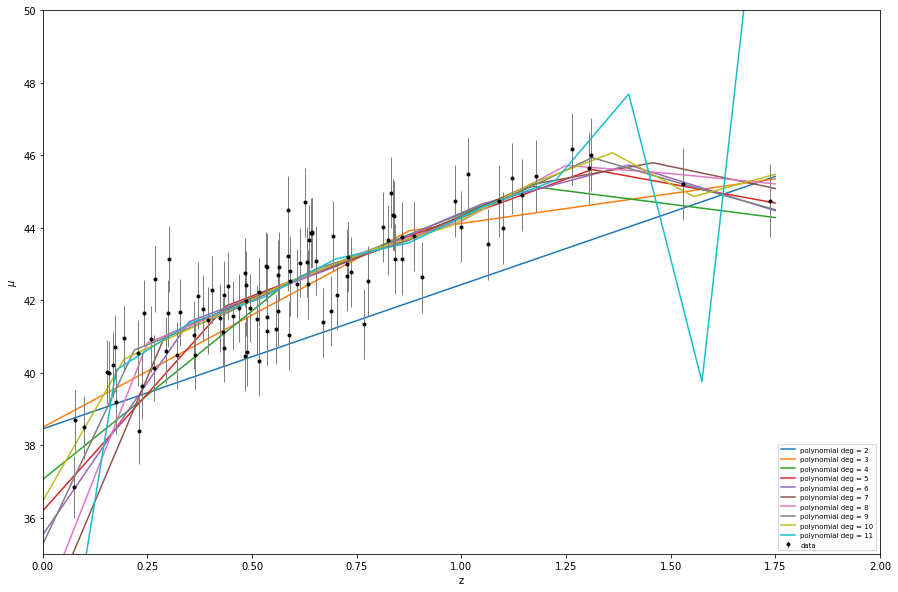

In [5]:
# Polynomial Regression
yy=[]
xx=[]
BIC=[]

for i in range(10):
    X_new=np.linspace(0,1.75,i+2).reshape(i+2,-1)
    xx.append(X_new)
    degree = 2+i
    model = PolynomialRegression(degree) # fit 3rd degree polynomial
    model.fit(X, y)

    y_pred1 = model.predict(X_new)
    yy.append(y_pred1)
    n_constraints = degree + 1
    
    print(model.coef_)

plt.figure(figsize=(15,10))

for j in range(len(xx)):

    plt.plot(xx[j],yy[j], label='polynomial deg = %1.0f' % (j+2))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")    
plt.legend(loc='lower right', fontsize='x-small')
plt.xlim(0,2)
plt.ylim(35,50)

[ 12.99040428  50.51331313 127.97212219]
[ 1.23225317 26.12581513  9.58129636 21.28679694 14.39510617 20.31489487
 20.9947413 ]
[ 25.96469148   1.55580853   6.01043212   0.45631163   7.0491678
   0.2145297    9.01979536  -3.1259644   18.53070136 -20.35385204
  35.48265129]
[  -89.13818724    34.87842037     9.59931656    27.86388213
    13.52528396    26.41147736    14.19949768    27.26803868
    11.92911673    34.82536848   -11.90713599   130.78910517
  -443.77384883  1799.53881278 -4209.23626771]
[ 2.34004230e+01  3.53043420e-01  3.98391198e+00 -1.91526967e-01
  4.52512767e+00 -2.18270964e-01  4.32951571e+00  7.40537222e-01
  3.36725230e+00  1.88186526e+00  2.42866644e+00  4.73291102e+00
 -1.03986904e+01  8.04179292e+01 -5.27560921e+02  4.40057904e+03
 -4.13495427e+04  3.54819810e+05 -1.55728188e+06]


(35.0, 50.0)

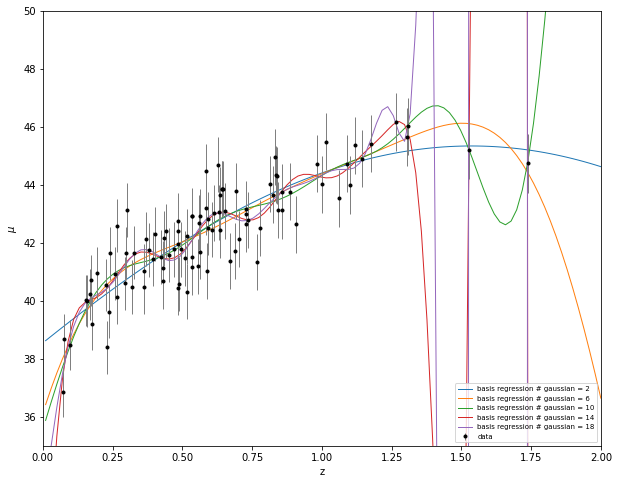

In [8]:
# Basis Function Regression

# data
Xtest = X

ytest = y 

dytest=dmu

n_gauss=np.arange(1,20)

plt.figure(figsize=(10,8))

for i in range(2,len(n_gauss),4):
    # mean positions of the 10 Gaussians in the model
    X_gridtest = np.linspace(0,2,i)[:, None]
    # widths of these Gaussians
    sigma_test = 1.0 * (X_gridtest[1] - X_gridtest[0])
    
    model = BasisFunctionRegression('gaussian', mu=X_gridtest, sigma=sigma_test)
    model.fit(Xtest, ytest, dytest)
    
    zz=np.linspace(0.01, 2, 100)
    
    y_pred2 = model.predict(zz.reshape(-1,1))
    print(model.coef_)
    
    
    plt.plot(zz,y_pred2,linewidth=1, label='basis regression # gaussian = %1.0f' % (i))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")    
plt.legend(loc='lower right', fontsize='x-small')
plt.xlim(0,2)
plt.ylim(35,50)


(35.0, 50.0)

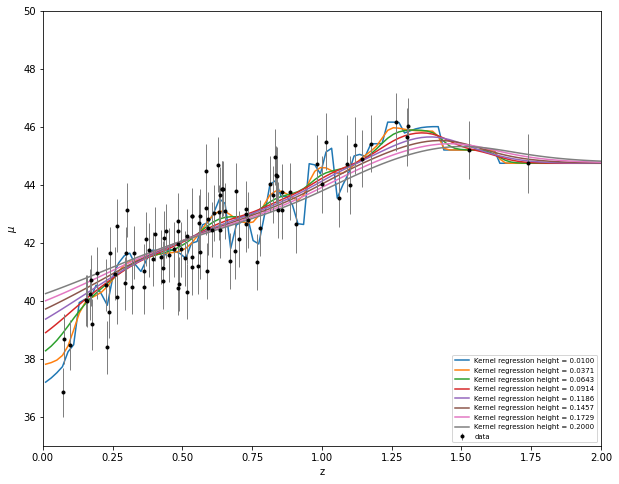

In [9]:
# Kernel regression

Xtest=X
ytest=y

plt.figure(figsize=(10,8))

height=np.linspace(0.01,0.2,8)

for i in height: 
    
    model = NadarayaWatson(kernel='gaussian', h=i)
    model.fit(Xtest,ytest)

    y_pred3 = model.predict(zz.reshape(-1,1))
    
    plt.plot(zz,y_pred3,label='Kernel regression height = %1.4f' % (i))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")    
plt.legend(loc='lower right', fontsize='x-small')
plt.xlim(0,2)
plt.ylim(35,50)

- If the training and CV error have converged -> model is bias dominated i.e. underfitting
- If the training and CV error have converged -> model is variance dominated i.e. overfitting

Increase the number of data point doesn't help

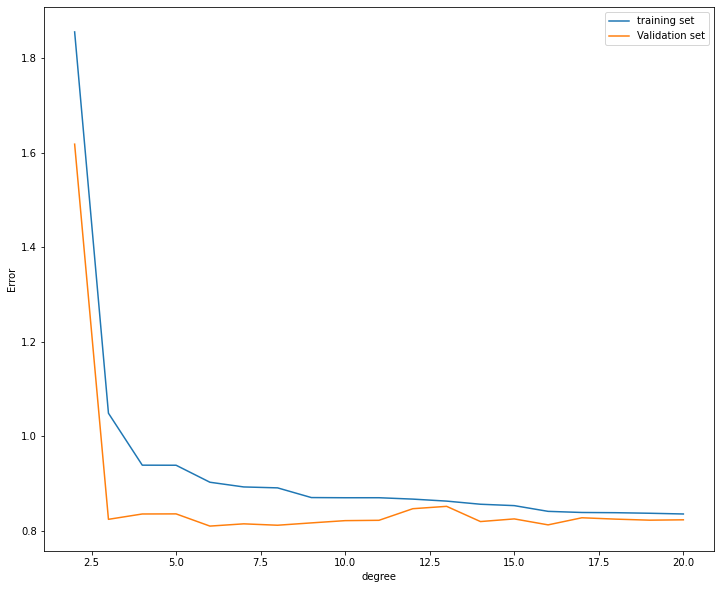

In [10]:
d = np.arange(2, 21)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

x, x_cv, ydy, ydy_cv = train_test_split(X, np.array([y,dmu]).T, test_size=0.3, random_state=42)
y,dy=ydy.T
y_cv,dy_cv=ydy_cv.T



fig = plt.figure(figsize=(12, 10))
for i in range(len(d)):
    model = PolynomialRegression(i)
    model.fit(x,y,dy)
    
    training_err[i] = np.sqrt(np.sum((y - model.predict(x)) ** 2)/ len(y))
    crossval_err[i] = np.sqrt(np.sum((y_cv - model.predict(x_cv)) ** 2)/ len(y_cv))


plt.plot(d,training_err, label='training set')
plt.plot(d,crossval_err,label='Validation set')
plt.xlabel('degree')
plt.ylabel('Error')
plt.legend(loc=0)

Let me plot the best model accordingly to the best degree given by the comparison between the CV and train sets. I can also check the result with the BIC. (4)

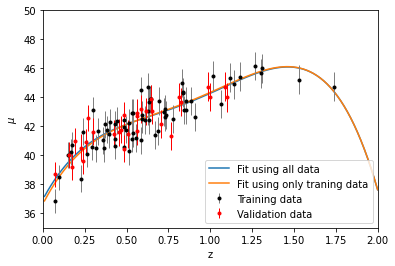

In [11]:
plt.figure()
classifier = PolynomialRegression(4)

classifier.fit(z_sample[:,np.newaxis], mu_sample,dmu) # in this case dy is irrelevant because errors are homoscedastic
mu_fit = classifier.predict(zz[:,np.newaxis])

mu_fit = classifier.predict(zz[:,np.newaxis])

plt.plot(zz, mu_fit, label='Fit using all data')


classifier.fit(x, y, dy) # in this case dy is irrelevant because errors are homoscedastic
mu_fit = classifier.predict(zz[:,np.newaxis])

plt.plot(zz, mu_fit, label='Fit using only traning data')

#plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

plt.errorbar(x, y, dy, fmt='.k', ecolor='gray', lw=1,label='Training data')
plt.errorbar(x_cv, y_cv, dy_cv, fmt='.r', ecolor='red', lw=1, label='Validation data')

#plt.plot(zz, mu_true, '--', c='gray',label='true')

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend(loc='lower right')